<a href="https://colab.research.google.com/gist/luc-leonard/960bf6f738f4de49bf34a7f878c0a99d/vq-diffusion-colab-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQ-Diffusion Colab Demo
[Link to VQ-Diffusion GitHub](https://github.com/microsoft/VQ-Diffusion)

* Requires a GPU runtime (check at Runtime -> Change runtime type)
* Models may take a while to download :)

In [1]:
# #@title Download requirements

# !git clone https://github.com/microsoft/vq-diffusion.git
%cd VQ-Diffusion

# !pip install torchvision --no-cache-dir -U
# !pip install omegaconf pytorch-lightning --no-cache-dir -U
# !pip install timm==0.3.4 --no-cache-dir -U
# !pip install tensorboard==1.15.0 --no-cache-dir -U
# !pip install lmdb tqdm --no-cache-dir -U
# !pip install einops ftfy --no-cache-dir -U
# !pip install git+https://github.com/openai/DALL-E.git --no-cache-dir -U

/home/lleonard/dev/perso/clip_generators/clip_generators/models/vq-diffusion/VQ-Diffusion


In [2]:
#@title Download & Load Models

from pathlib import Path
import os

diffusion_model_name = "human_pretrained.pth" #@param ["CC_pretrained.pth", "coco_pretrained.pth", "cub_pretrained.pth", "human_pretrained.pth"]
vqvae_model_name = "taming_f8_8192_openimages_last.pth" #@param ["vqgan_ffhq_f16_1024.pth", "taming_f8_8192_openimages_last.pth", "vqgan_imagenet_f16_16384.pth"]
clip_model_name = "ViT-B-32.pt" #@param ["ViT-B-32.pt"]
config_file_name = "config_text.yaml" #@param ["config_text.yaml", "cc15m_930.yaml", "coco.yaml", "cub200.yaml", "ffhq.yaml", "imagenet.yaml"]

print("downloading diffusion model...")
model_path = Path(f'OUTPUT/pretrained_model/{diffusion_model_name}')
if not model_path.exists():
    os.system(f'wget "https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/{diffusion_model_name}" -O {str(model_path)}')
else:
    print(f"{model_path.name} has already been downloaded, skipping...")

print("downloading VAE model...")
vae_path = Path(f'OUTPUT/pretrained_model/taming_dvae/{vqvae_model_name}')
if not vae_path.exists():
    os.system(f'wget "https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/taming_dvae/{vqvae_model_name}" -O {str(vae_path)}')
else:
    print(f"{vae_path.name} has already been downloaded, skipping...")

print("downloading CLIP model...")
clip_path = Path(f'OUTPUT/pretrained_model/{clip_model_name}')
if not clip_path.exists():
    os.system(f'wget "https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/{clip_model_name}" -O {str(clip_path)}')
else:
    print(f"{clip_path.name} has already been downloaded, skipping...")

print()

# ---

from inference_VQ_Diffusion import VQ_Diffusion

if config_file_name == "config_text.yaml":
    config_file_path = 'OUTPUT/pretrained_model/' + config_file_name
else:
    config_file_path = 'configs/' + config_file_name

print("loading models...")
VQ_Diffusion_model = VQ_Diffusion(config=config_file_path, path=str(model_path))
print("loaded models")

downloading diffusion model...
CC_pretrained.pth has already been downloaded, skipping...
downloading VAE model...
taming_f8_8192_openimages_last.pth has already been downloaded, skipping...
downloading CLIP model...
ViT-B-32.pt has already been downloaded, skipping...

loading models...
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


/home/lleonard/.cache/pypoetry/virtualenvs/clip-generators-W525Pgsi-py3.8/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


{'overall': {'trainable': '370.77M', 'non_trainable': '126.29M', 'total': '497.06M'}, 'content_codec': {'trainable': '0', 'non_trainable': '65.8M', 'total': '65.8M'}, 'condition_codec': {'trainable': '0', 'non_trainable': '0', 'total': '0'}, 'transformer': {'trainable': '370.77M', 'non_trainable': '60.49M', 'total': '431.26M'}}
Model missing keys:
 []
Model unexpected keys:
 ['transformer.log_alpha', 'transformer.log_1_min_alpha', 'transformer.log_cumprod_alpha', 'transformer.log_1_min_cumprod_alpha']
Evaluate EMA model
loaded models


saved images at /home/lleonard/dev/perso/clip_generators/clip_generators/models/vq-diffusion/VQ-Diffusion/RESULT/A baasket full of fruits


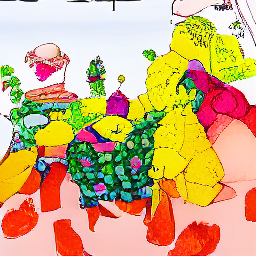

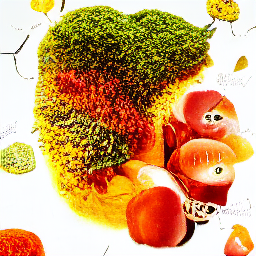

In [6]:
#@title Generate from Prompt

from IPython.display import display
from pathlib import Path
from PIL import Image

prompt = "A baasket full of fruits" #@param {type:"string"}
number_to_generate = 2 #@param {type:"integer"}

VQ_Diffusion_model.inference_generate_sample_with_condition(prompt,
                                                            truncation_rate=0.85,
                                                            save_root="RESULT",
                                                            batch_size=number_to_generate)

path = Path(f"RESULT/{prompt}/")

print(f"saved images at {path.resolve()}")

for image in path.glob("*.png"):
    display(Image.open(image))